In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Aporte em uma ação, realizados todos no mesmo dia

In [ ]:
#configurando carteira!
compras = {
"BPAC11.SA" : 1500
,"ITUB3.SA" : 1500
,"VALE3.SA" : 500
,"EGIE3.SA" : 1500
,"WEGE3.SA" : 1000
,"IVVB11.SA" : 1000

           }
compras.keys()

dict_keys(['BPAC11.SA', 'ITUB3.SA', 'VALE3.SA', 'EGIE3.SA', 'WEGE3.SA', 'IVVB11.SA'])

In [ ]:
#importando os dados
inicio = "2018-01-01"
fim = "2023-12-31"

precos = yf.download(list(compras.keys()),start=inicio,end = fim)["Adj Close"]
display(precos)

[*********************100%%**********************]  6 of 6 completed


Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2018-01-02,3.879362,19.145197,18.409048,92.120003,27.350492,8.752856
2018-01-03,3.916308,19.016562,18.552574,92.099998,27.186600,8.619921
2018-01-04,3.930676,18.770014,18.758278,92.419998,27.298046,8.535961
2018-01-05,3.995665,18.866486,18.887459,92.800003,27.724167,8.570941
2018-01-08,4.044626,18.973682,18.782211,93.360001,28.340401,8.640913
...,...,...,...,...,...,...
2023-12-21,36.511269,44.422287,27.029528,256.799988,76.970001,36.088661
2023-12-22,36.650700,44.570000,27.241220,256.250000,76.389999,36.207664
2023-12-26,37.138714,44.790001,27.558762,256.149994,76.660004,36.415928


# Simulacao da carteira ficticia

In [ ]:

primeiro =  precos.iloc[0]

In [ ]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))
compras_df

BPAC11.SA    1500
ITUB3.SA     1500
VALE3.SA      500
EGIE3.SA     1500
WEGE3.SA     1000
IVVB11.SA    1000
dtype: int64

In [ ]:
qnt_acoes = round(compras_df/primeiro , 0)
qnt_acoes

BPAC11.SA    387.0
EGIE3.SA      78.0
ITUB3.SA      81.0
IVVB11.SA     11.0
VALE3.SA      18.0
WEGE3.SA     114.0
dtype: float64

In [ ]:
pl = precos*qnt_acoes
pl

Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2018-01-02,1501.313227,1493.325359,1491.132895,1013.320030,492.308865,997.825613
2018-01-03,1515.611352,1483.291798,1502.758507,1013.099983,489.358795,982.670963
2018-01-04,1521.171698,1464.061077,1519.420509,1016.619980,491.364830,973.099571
2018-01-05,1546.322199,1471.585876,1529.884163,1020.800034,499.035004,977.087271
2018-01-08,1565.270169,1479.947227,1521.359116,1026.960007,510.127213,985.064083
...,...,...,...,...,...,...
2023-12-21,14129.860954,3464.938385,2189.391741,2824.799866,1385.460022,4114.107376
2023-12-22,14183.820751,3476.459976,2206.538858,2818.750000,1375.019989,4127.673752
2023-12-26,14372.682255,3493.620071,2232.259689,2817.649933,1379.880066,4151.415779


In [ ]:
pl["PL Total"] =pl.sum(axis = 1) #eixo 0 -> eixo linhas ----- eixo 1-> eixo colunas

In [ ]:
pl.head()


Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,
2018-01-02,1501.313227,1493.325359,1491.132895,1013.320030,492.308865,997.825613,6989.225989
2018-01-03,1515.611352,1483.291798,1502.758507,1013.099983,489.358795,982.670963,6986.791398
2018-01-04,1521.171698,1464.061077,1519.420509,1016.619980,491.364830,973.099571,6985.737665
2018-01-05,1546.322199,1471.585876,1529.884163,1020.800034,499.035004,977.087271,7044.714546
2018-01-08,1565.270169,1479.947227,1521.359116,1026.960007,510.127213,985.064083,7088.727814


In [ ]:
pl.tail()

Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,
2023-12-21,14129.860954,3464.938385,2189.391741,2824.799866,1385.460022,4114.107376,28108.558344
2023-12-22,14183.820751,3476.459976,2206.538858,2818.750000,1375.019989,4127.673752,28188.263327
2023-12-26,14372.682255,3493.620071,2232.259689,2817.649933,1379.880066,4151.415779,28447.507793
2023-12-27,14476.748737,3528.720131,2244.730545,2818.309906,1393.200027,4164.982590,28626.691936
2023-12-28,14496.020199,3535.740143,2247.848104,2833.709839,1389.599945,4172.896454,28675.814684


# Comparando com  o IBOV

In [ ]:
ibov = yf.download("^BVSP", start=inicio,end= fim) ["Adj Close"]


[*********************100%%**********************]  1 of 1 completed


Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2023-12-21    132182.0
2023-12-22    132753.0
2023-12-26    133533.0
2023-12-27    134194.0
2023-12-28    134185.0
Name: Adj Close, Length: 1486, dtype: float64

In [ ]:
ibov = pd.DataFrame(ibov)
ibov.rename(columns = {"Adj Close" : "IBOV"},inplace = True)
display(ibov)

,IBOV
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0
...,...
2023-12-21,132182.0
2023-12-22,132753.0
2023-12-26,133533.0


In [ ]:
consolidado = pd.merge(ibov,pl, how ="inner", on = "Date")

In [ ]:
consolidado.head()

,IBOV,BPAC11.SA,EGIE3.SA,ITUB3.SA,IVVB11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2018-01-02,77891.0,1501.313227,1493.325359,1491.132895,1013.320030,492.308865,997.825613,6989.225989
2018-01-03,77995.0,1515.611352,1483.291798,1502.758507,1013.099983,489.358795,982.670963,6986.791398
2018-01-04,78647.0,1521.171698,1464.061077,1519.420509,1016.619980,491.364830,973.099571,6985.737665
2018-01-05,79071.0,1546.322199,1471.585876,1529.884163,1020.800034,499.035004,977.087271,7044.714546
2018-01-08,79379.0,1565.270169,1479.947227,1521.359116,1026.960007,510.127213,985.064083,7088.727814


# Normalizando os dados e ajustando em escala


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

<Axes: xlabel='Date'>

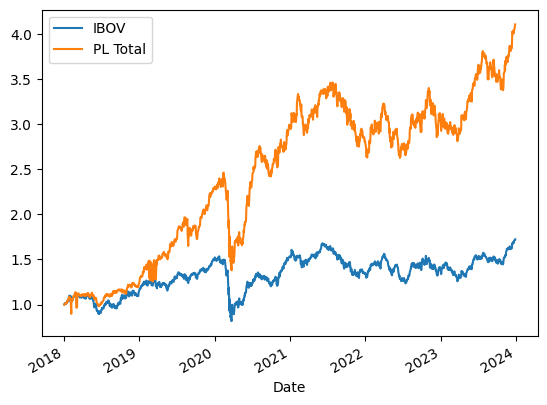

In [ ]:
consolidado_ajustado[["IBOV", "PL Total"]].plot()

<Axes: xlabel='Date'>

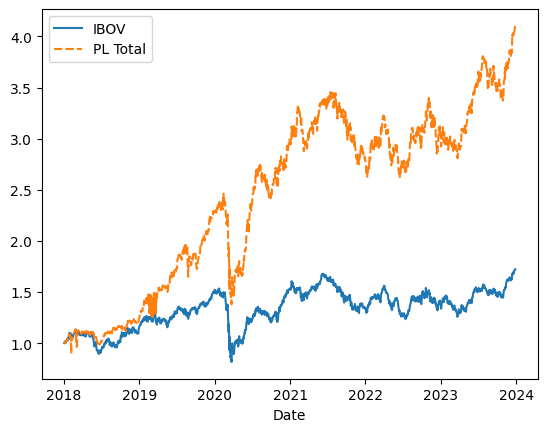

In [ ]:
sns.lineplot(data=consolidado_ajustado[["IBOV", "PL Total"]])

# Funcao para simular carteira


In [ ]:
def simulacao_carteira(inicio, fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress = False)['Adj Close']
  primeiro = precos.iloc[0]
  compras_df = pd.Series(data = carteira, index = list(carteira.keys()))
  qtd_acoes = compras_df/primeiro
  qtd_acoes = round(qtd_acoes,0)
  PL = precos*qtd_acoes
  PL['PL Total'] = PL.sum(axis = 1)
  ibov = yf.download('^BVSP', start = inicio, end =  fim, progress = False)
  ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
  ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)
  consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
  consolidado_adj = consolidado/consolidado.iloc[0]
  consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6));



In [ ]:
fiis = {
"HGLG11.SA" : 1500
,"BTLG11.SA" : 1500
,"XPML11.SA" : 500
,"MXRF11.SA" : 1500
,"KNRI11.SA" : 1000
,"XPLG11.SA" : 1000

           }

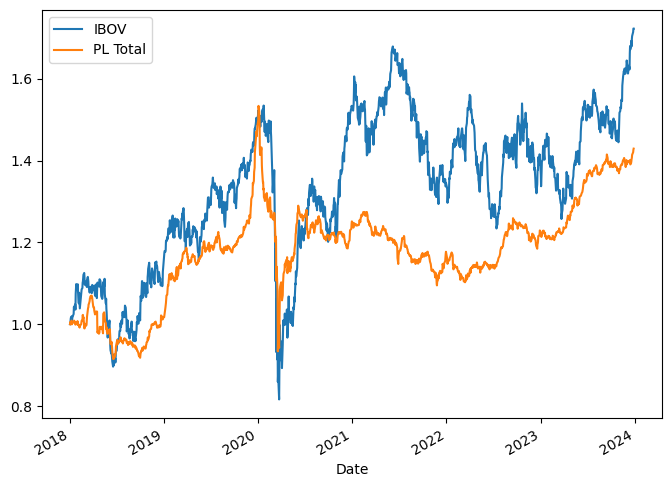

In [ ]:
simulacao_carteira(inicio,fim,fiis)